In [2]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import datetime as dt

from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.arima_model import ARIMA

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [6]:
df = pd.read_csv("DEXUSEU.csv")
df["DATE"] = pd.to_datetime(df["DATE"])
df.set_index("DATE", inplace=True)
df.dropna(inplace=True)
df.head()

,DEXUSEU
DATE,
2013-09-30,1.3535
2013-10-01,1.3534
2013-10-02,1.3592
2013-10-03,1.3642
2013-10-04,1.3582


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1253 entries, 2013-09-30 to 2018-09-28
Data columns (total 1 columns):
DEXUSEU    1253 non-null float64
dtypes: float64(1)
memory usage: 19.6 KB


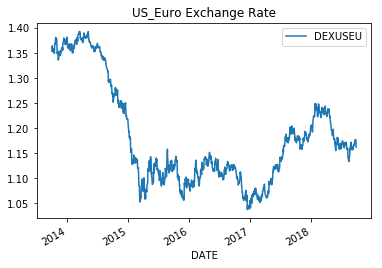

In [8]:
df.plot()
plt.title("US_Euro Exchange Rate")
plt.show()

## Stationary data
### Calculate first difference

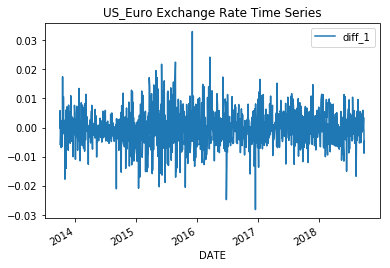

In [9]:
df["diff_1"] = df["DEXUSEU"] - df["DEXUSEU"].shift(periods=1)
df["diff_1"].plot()
plt.title("US_Euro Exchange Rate Time Series")
plt.legend()
plt.show()

### Calculate second difference

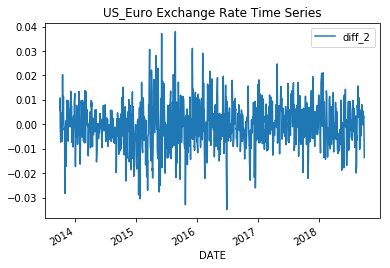

In [17]:
df["diff_2"] = df["DEXUSEU"] - df["DEXUSEU"].shift(periods=2)
df["diff_2"].plot()
plt.title("US_Euro Exchange Rate Time Series")
plt.legend()
plt.show()

## PACF

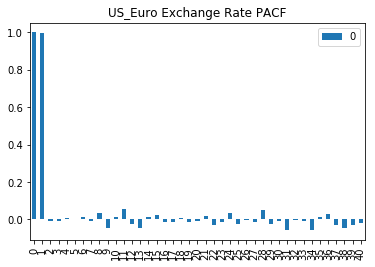

In [10]:
x_acf = pd.DataFrame(pacf(df["DEXUSEU"]))
x_acf.plot(kind="bar")
plt.title("US_Euro Exchange Rate PACF")
plt.show()

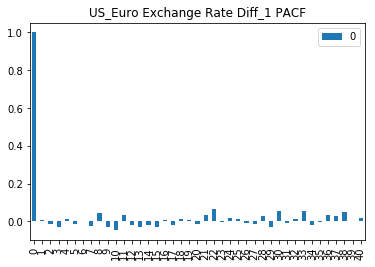

In [11]:
x_acf = pd.DataFrame(pacf(df["diff_1"][1:]))
x_acf.plot(kind="bar")
plt.title("US_Euro Exchange Rate Diff_1 PACF")
plt.show()

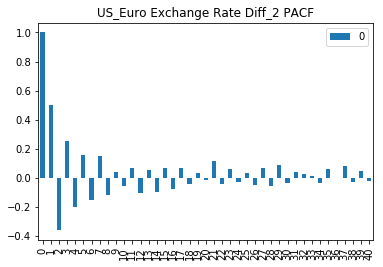

In [18]:
x_acf = pd.DataFrame(pacf(df["diff_2"][2:]))
x_acf.plot(kind="bar")
plt.title("US_Euro Exchange Rate Diff_2 PACF")
plt.show()

## ARIMA

In [19]:
model = ARIMA(df["DEXUSEU"], order=(0, 1, 0))
model_fit = model.fit()
print(model_fit.summary())
print("Residuals Description")
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:              D.DEXUSEU   No. Observations:                 1252
Model:                 ARIMA(0, 1, 0)   Log Likelihood                4600.306
Method:                           css   S.D. of innovations              0.006
Date:                Thu, 04 Oct 2018   AIC                          -9196.612
Time:                        11:55:29   BIC                          -9186.347
Sample:                             1   HQIC                         -9192.753
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.000     -0.881      0.379      -0.000       0.000
Residuals Description
count    1.252000e+03
mean     1.508612e-10
std      6.140159e-03
min     -2.794720e-02
25%     -3.447204e-03

In [20]:
model = ARIMA(df["DEXUSEU"], order=(1, 0, 0))
model_fit = model.fit()
print(model_fit.summary())
print("Residuals Description")
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                DEXUSEU   No. Observations:                 1253
Model:                     ARMA(1, 0)   Log Likelihood                4601.279
Method:                       css-mle   S.D. of innovations              0.006
Date:                Thu, 04 Oct 2018   AIC                          -9196.559
Time:                        11:55:31   BIC                          -9181.159
Sample:                             0   HQIC                         -9190.770
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.2193      0.076     16.092      0.000       1.071       1.368
ar.L1.DEXUSEU     0.9983      0.001    733.851      0.000       0.996       1.001
                                    Root

In [21]:
model = ARIMA(df["DEXUSEU"], order=(1, 0, 0))
model_fit = model.fit()
print(model_fit.summary())
print("Residuals Description")
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                DEXUSEU   No. Observations:                 1253
Model:                     ARMA(1, 0)   Log Likelihood                4601.279
Method:                       css-mle   S.D. of innovations              0.006
Date:                Thu, 04 Oct 2018   AIC                          -9196.559
Time:                        11:55:39   BIC                          -9181.159
Sample:                             0   HQIC                         -9190.770
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.2193      0.076     16.092      0.000       1.071       1.368
ar.L1.DEXUSEU     0.9983      0.001    733.851      0.000       0.996       1.001
                                    Root

In [22]:
model = ARIMA(df["DEXUSEU"], order=(1, 0, 1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
print("Residuals Description")
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                DEXUSEU   No. Observations:                 1253
Model:                     ARMA(1, 1)   Log Likelihood                4601.354
Method:                       css-mle   S.D. of innovations              0.006
Date:                Thu, 04 Oct 2018   AIC                          -9194.708
Time:                        11:55:42   BIC                          -9174.175
Sample:                             0   HQIC                         -9186.990
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.2189      0.075     16.182      0.000       1.071       1.367
ar.L1.DEXUSEU     0.9983      0.001    720.792      0.000       0.996       1.001
ma.L1.DEXUSEU     0.0111      0.029     

In [25]:
model = ARIMA(df["diff_1"].dropna(), order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())
print("Residuals Description")
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.diff_1   No. Observations:                 1251
Model:                 ARIMA(1, 1, 1)   Log Likelihood                4587.708
Method:                       css-mle   S.D. of innovations              0.006
Date:                Thu, 04 Oct 2018   AIC                          -9167.415
Time:                        11:56:19   BIC                          -9146.889
Sample:                             1   HQIC                         -9159.699
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -3.2e-07   4.41e-06     -0.073      0.942   -8.96e-06    8.32e-06
ar.L1.D.diff_1    -0.0048      0.029     -0.163      0.870      -0.062       0.053
ma.L1.D.diff_1    -0.9754      0.017

In [27]:
model = ARIMA(df["diff_2"].dropna(), order=(5, 1, 5))
model_fit = model.fit()
print(model_fit.summary())
print("Residuals Description")
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.diff_2   No. Observations:                 1250
Model:                 ARIMA(5, 1, 5)   Log Likelihood                4588.475
Method:                       css-mle   S.D. of innovations              0.006
Date:                Thu, 04 Oct 2018   AIC                          -9152.951
Time:                        11:57:50   BIC                          -9091.380
Sample:                             1   HQIC                         -9129.804
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.205e-07   3.11e-06      0.039      0.969   -5.98e-06    6.22e-06
ar.L1.D.diff_2    -0.1252        nan        nan        nan         nan         nan
ar.L2.D.diff_2    -0.6040      0.307